# HW2: Perceptron Algorithm

### Step 0: Imports

In [104]:
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Preprocessing

In [105]:
im_size = 784

num_images = 2000
images = np.ndarray((num_images, im_size), dtype=int)
i = 0
with open('data/train35.digits') as train_digits:
    for line in train_digits:
        #Split into a vector, convert to integer vector, convert to np array, update images matrix
        vec = line.split()
        vec = list(map(int, vec))
        vec = np.array(vec)
        images[i] = vec
        i += 1


num_testimages = 200
test_images = np.ndarray((num_testimages, im_size), dtype=int)
i = 0
with open('data/test35.digits') as test_digits:
    for line in test_digits:
        #Split into a vector, convert to integer vector, convert to np array, update images matrix
        vec = line.split()
        vec = list(map(int, vec))
        vec = np.array(vec)
        test_images[i] = vec
        i += 1

y = np.ndarray(num_images, dtype=int)
i = 0
with open('data/train35.labels') as train_labels:
    for line in train_labels:
        y[i] = int(line)
        i = i + 1

### Step 2: Create the Perceptron

In [106]:
w = np.zeros(784)
yhat = np.zeros(num_images, dtype=int)

M = 10

e = []

for i in range(M):
    for t in range(num_images):
        #Generate dot product and make prediction
        dotprod = np.dot(w, images[t])
        if dotprod >= 0:
            yhat[t] = 1
        else:
            yhat[t] = -1
        
        #Check if we're wrong, and update accordingly
        if yhat[t] == -1 and y[t] == 1:
            w = w + images[t]
        elif yhat[t] == 1 and y[t] == -1:
            w = w - images[t]

    #calculate error
    mistakes = 0
    for i in range(len(y)):
        if yhat[i] - y[i] != 0:
            mistakes += 1

    error = mistakes/num_images
    e.append(error)                 
  


### Step 3: Plot empirical error over M iterations

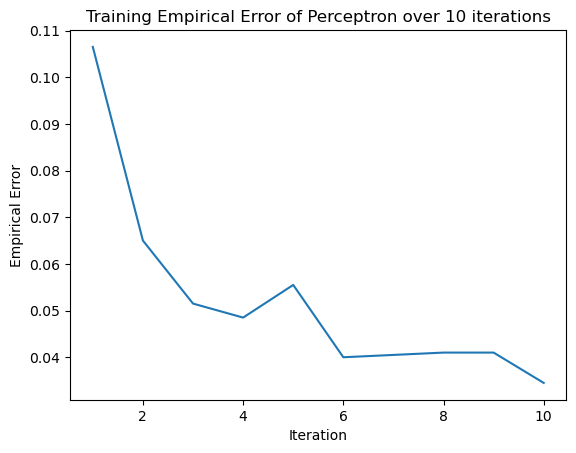

In [107]:
m_values = np.arange(M) + 1
fig, ax = plt.subplots()
ax.set_title(f"Training Empirical Error of Perceptron over {M} iterations")
ax.set_xlabel("Iteration")
ax.set_ylabel("Empirical Error")
plt.plot(m_values, e)


### Step 4: Feed weights into testing data

In [108]:
ytest = np.zeros(num_testimages, dtype=int)
for t in range(num_testimages):
    dotprod = np.dot(w, test_images[t])
    if dotprod >= 0:
        ytest[t] = int(1)
    else:
        ytest[t] = int(-1)

### Step 5: Print predictions to output file

In [109]:
f = open('data/test35.predictions', 'w', encoding='utf-8')
for i in range(len(ytest)):
    f.write(f'{ytest[i]}\n')